 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Random Forest Classifier </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/06/2022

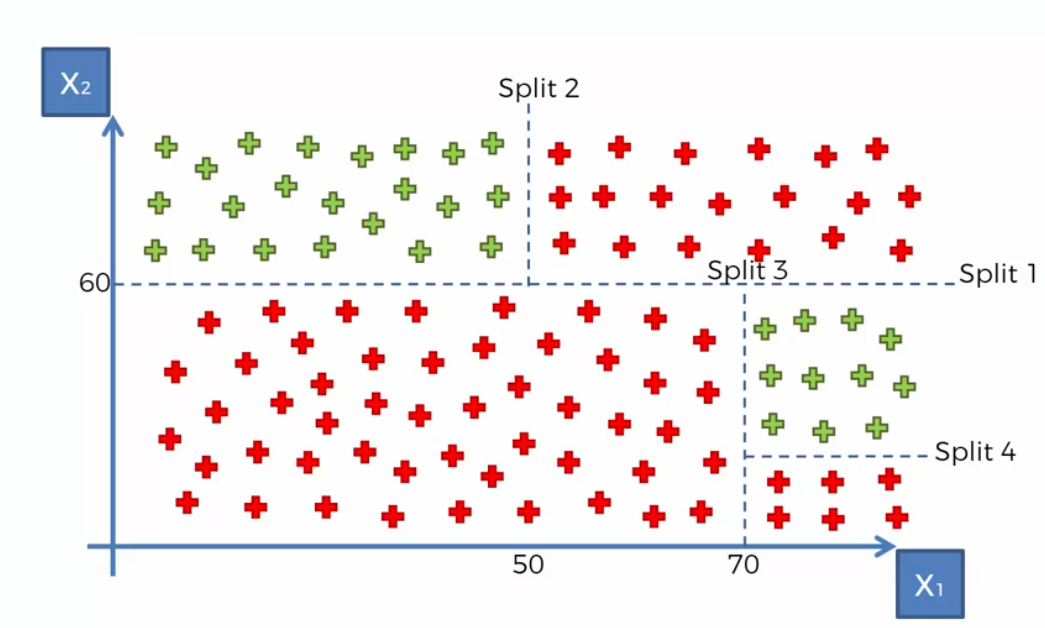
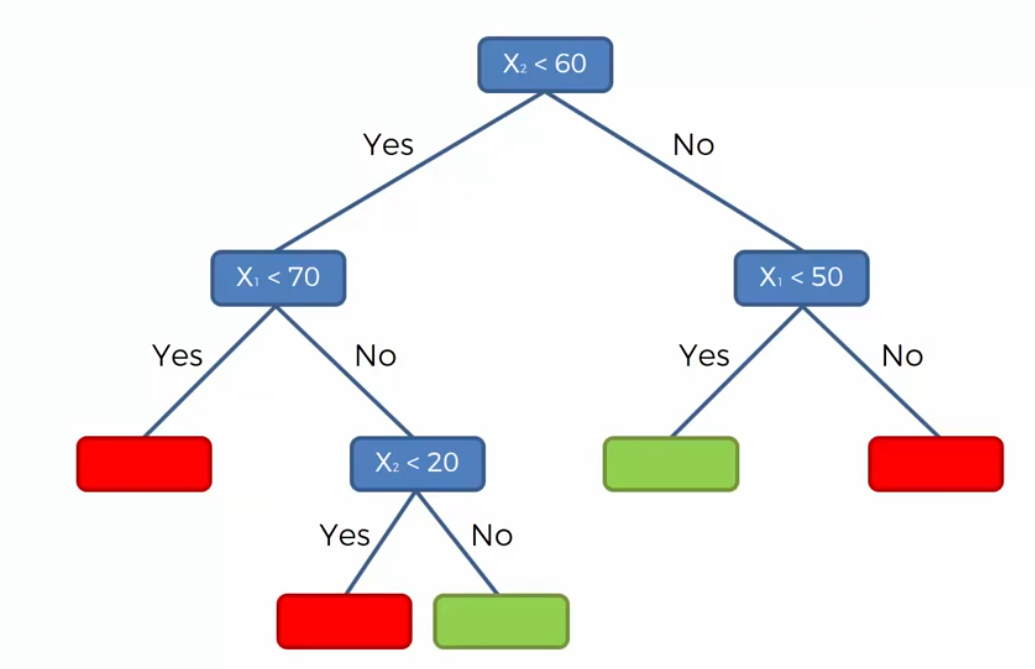

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score,f1_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [3]:
#CSV file
df = pd.read_csv("Social_Network_Ads.csv")
display(df.head())
print(df.shape)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(400, 5)


- Here we have one columns like userID, gender, Age, there salary and they purchased the data or not
- We have to create a Logistic regressor that fits the data

c:\users\kumar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    257
1    143
Name: Purchased, dtype: int64

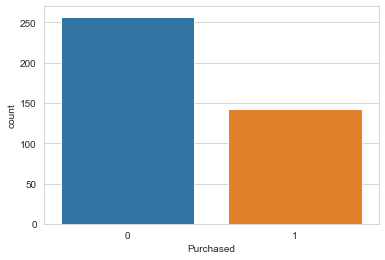

In [4]:
sns.set_style("whitegrid")
plot = sns.countplot(df['Purchased'])
display(df['Purchased'].value_counts())

## Checking for NULL values

In [5]:
#checking for NULL
print(df.isnull().sum()*100/df.shape[0])

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the Train and Test data

In [6]:
#Getting X and y variable
X = df[['Age', 'EstimatedSalary']]
y =df['Purchased']

In [7]:
display(X.head())
print("Shape of X ",X.shape)
print("\n\n")
display(y.head().reset_index())
print("Shape of y", y.shape)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


Shape of X  (400, 2)





,index,Purchased
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Shape of y (400,)


In [8]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4,random_state=0)

## Standard Scaling

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train) #here we need to feed this to model to learn so it will learn the parameter of scaling
X_test = ss.transform(X_test) #It will use the learn parameter to transform

In [10]:
#Creating a model object and fiting the data
#cla = SVC(kernel='linear', random_state=0)
cla = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
cla.fit(X_train,y_train)

y_test_pred = cla.predict(X_test) #predicting the Test data

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


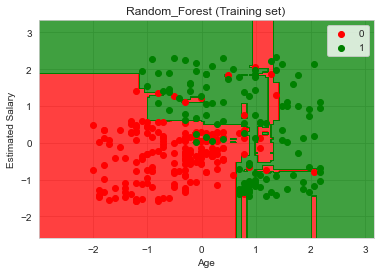

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cla.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random_Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


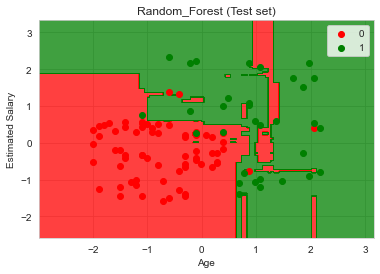

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cla.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random_Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Metrics

<b>Accuracy</b> - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations <br>
<b>Accuracy = TP+TN/TP+FP+FN+TN</b> <br><br>

<b>Precision</b> - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate<br>
<b>Precision = TP/TP+FP</b> <br><br>

<b>Recall (Sensitivity)</b> - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.
<br>
<b>Recall = TP/TP+FN</b> <br><br>

<b>F1 score<b> - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.<br>
<b>F1 Score = 2*(Recall * Precision) / (Recall + Precision)</b> <br><br>

## Confusion matrix

In [13]:
model_name = []
Accuracy = []
Precision = []
Recall= []
F1_score = []

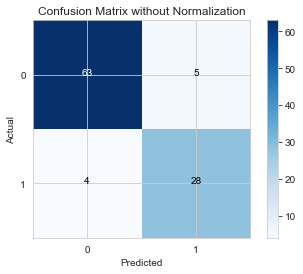

In [14]:
cf = confusion_matrix(y_test,y_test_pred)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [15]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_test_pred)
print('F1 score: %f' % f1)

model_name.append('Random Forest')
Accuracy.append(round(accuracy, 2))
Precision.append(round(precision, 2))
Recall.append(round(recall, 2))
F1_score.append(round(f1, 2))

Accuracy: 0.910000
Precision: 0.848485
Recall: 0.875000
F1 score: 0.861538


In [16]:
df_results = pd.DataFrame({'Model Name': model_name, 'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1_score': F1_score})
df_results

,Model Name,Accuracy,Precision,Recall,F1_score
0,Random Forest,0.91,0.85,0.88,0.86
